In [32]:
import numpy as np
import json
from itertools import product

In [33]:
data = json.load(open("/home/tom/Programming/SCONE/cmfd_workflow/vacuum_boundary.json"))

In [34]:
current_data = data["active"]["current"]
current_matrix = np.array(current_data["JM"])

transport_data = data["active"]["TransportXS"]
transportXS_matrix = np.array(transport_data["transportXS"])
totalXS_matrix = np.array(transport_data["totalXS"])
raw_scatterXS = np.array(transport_data["scatterXS"])
scatterXS_matrix = np.array(transport_data["scatteringProductionXS"])
fissionXS_matrix = np.array(transport_data["fissionProductionXS"])
raw_fissionXS = np.array(transport_data["fissionXS"])
nu_bar_matrix = np.array(transport_data["nuBar"])
flux_matrix = np.array(data["active"]["fluxMap"]["Res"])

# TODO: properly extract spacing
spacing = [2, 50/10, 2]

beta = 0

In [35]:
flux_matrix.shape

(1, 10, 1, 1, 1, 2)

In [36]:
current_max_x = len(current_data["XBounds"]) + 1
current_max_y = len(current_data["YBounds"]) + 1
current_max_z = len(current_data["ZBounds"]) + 1
current_max_energy_group = len(transport_data["EnergyBounds"][0])

mesh_size_x = len(current_data["XBounds"])
mesh_size_y = len(current_data["YBounds"])
mesh_size_z = len(current_data["ZBounds"])

In [37]:
print(current_matrix.shape)
print(flux_matrix.shape)
print(transportXS_matrix.shape)

print(scatterXS_matrix.shape)
print(fissionXS_matrix.shape)

print()

for i0, i0_l in enumerate(current_matrix):
    for i1, i1_l in enumerate(i0_l):
        for i2, i2_l in enumerate(i1_l):
            for i3, i3_l in enumerate(i2_l):
                for i4, i4_l in enumerate(i3_l):
                    if current_matrix[i0, i1, i2, i3, i4, 0]:
                        print(i0, i1, i2, i3, i4, 0, current_matrix[i0, i1, i2, i3, i4, 0])


(1, 3, 2, 11, 2, 2)
(1, 10, 1, 1, 1, 2)
(1, 10, 1, 1, 2)
(1, 10, 1, 1, 1, 2)
(1, 10, 1, 1, 1, 2)

0 0 1 1 0 0 -1174.9
0 0 1 1 1 0 1183.47
0 0 1 2 0 0 -2297.24
0 0 1 2 1 0 2285.75
0 0 1 3 0 0 -2660.62
0 0 1 3 1 0 2643.63
0 0 1 4 0 0 -2754.62
0 0 1 4 1 0 2746.96
0 0 1 5 0 0 -2810.33
0 0 1 5 1 0 2797.8
0 0 1 6 0 0 -2796.06
0 0 1 6 1 0 2782.35
0 0 1 7 0 0 -2931.91
0 0 1 7 1 0 2924.63
0 0 1 8 0 0 -2783.15
0 0 1 8 1 0 2800.2
0 0 1 9 0 0 -2304.33
0 0 1 9 1 0 2303.88
0 0 1 10 0 0 -1111.86
0 0 1 10 1 0 1098.55
0 1 1 0 1 0 -155.47
0 1 1 1 1 0 -110.043
0 1 1 2 1 0 -30.9652
0 1 1 3 1 0 -9.55745
0 1 1 4 1 0 -1.26533
0 1 1 5 1 0 6.10579
0 1 1 6 1 0 -9.52527
0 1 1 7 1 0 25.7676
0 1 1 8 1 0 37.9619
0 1 1 9 1 0 104.69
0 1 1 10 1 0 160.015
0 2 0 1 1 0 -1158.92
0 2 0 2 1 0 -2328.41
0 2 0 3 1 0 -2642.76
0 2 0 4 1 0 -2781.49
0 2 0 5 1 0 -2795.12
0 2 0 6 1 0 -2782.59
0 2 0 7 1 0 -2931.65
0 2 0 8 1 0 -2802.75
0 2 0 9 1 0 -2309.4
0 2 0 10 1 0 -1101.52
0 2 1 1 1 0 1178.5
0 2 1 2 1 0 2289.14
0 2 1 3 1 0 2630.97

In [38]:
def print_matrix(matrix):
    return
    for row in matrix:
        for item in row:
            rounded = round(item, 4)
            if item == 0:
                print(f"{'--':<8}", end=" ")
            else:
                print(f"{rounded:<8}", end=" ")
        print("\n")

In [39]:
def get_current_on_cell_boundary_plus_half(direction, x, y, z, energy_group):
    # coord, direction, energy, mean/ std
    return current_matrix[energy_group, direction, z + 1, y + 1, x + 1, 0] / ((spacing[0] * spacing[1] * spacing[2]) / spacing[direction])

def get_flux_at_coordinate(x, y, z, energy_group):
    return flux_matrix[z, y, x, energy_group, 0, 0] / (spacing[0] * spacing[1] * spacing[2])

def get_transportXS_at_coordinate(x, y, z, energy_group):
    return transportXS_matrix[z, y, x, energy_group, 0]

def get_totalXS_at_coordinate(x, y, z, energy_group):
    return totalXS_matrix[z, y, x, energy_group, 0]

def get_scatter_xs(energy_to, energy_from, x, y, z):
    # TODO: check this
    return scatterXS_matrix[z, y, x, energy_from, energy_to, 0]

def get_raw_scatter_xs(energy, x, y, z):
    # TODO: check this
    return raw_scatterXS[z, y, x, energy, 0]

def get_raw_fission_xs(energy, x, y, z):
    # TODO: check this
    return raw_fissionXS[z, y, x, energy, 0]

def get_nu_bar(energy, x, y, z):
    # TODO: check this
    return nu_bar_matrix[z, y, x, energy, 0]

def get_fission_xs(energy_to, energy_from, x, y, z):
    # TODO: check this
    return fissionXS_matrix[z, y, x, energy_from, energy_to, 0]

In [40]:
# print(get_raw_scatter_xs(0, 0, 5, 0))
# print(get_scatter_xs(0, 0, 0, 5, 0))

# print()

# print(get_raw_fission_xs(0, 0, 5, 0))
# print(get_fission_xs(0, 0, 0, 5, 0))
# print(get_nu_bar(0, 0, 5, 0))

# print()

# print(get_transportXS_at_coordinate(0, 5, 0, 0))
# print(get_totalXS_at_coordinate(0, 5, 0, 0))

In [41]:
# # Calculate k_inf
# # Do I need to remove scattering multiplicity here?
# absorption_xs = get_totalXS_at_coordinate(0, 5, 0, 0) - get_scatter_xs(0, 0, 0, 5, 0)
# print(absorption_xs)

# # Assume utilization factor = 1

# eta = get_nu_bar(0, 0, 5, 0) * get_fission_xs(0, 0, 0, 5, 0) / absorption_xs
# k_inf = eta * absorption_xs
# print(eta)

In [42]:
diffusion_coefficient = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))

for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
    transport_XS = get_transportXS_at_coordinate(x, y, z, energy)
    assert transport_XS > 0
    diffusion_coefficient[x, y, z, energy] = 1.0 / (3.0 * transport_XS)


In [43]:
def build_linear_diffusive_term(direction):
    linear_diffusive_term_positive = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))
    linear_diffusive_term_negative = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))

    for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
        D = diffusion_coefficient[x, y, z, energy]

        is_on_high_boundary = [x == mesh_size_x - 1, y == mesh_size_y - 1, z == mesh_size_z - 1][direction]
        is_on_low_boundary = [x == 0, y == 0, z == 0][direction]
        delta_x, delta_y, delta_z = [(1, 0, 0), (0, 1, 0), (0, 0, 1)][direction]

        if is_on_low_boundary:
            coupling = (2 * D * (1 - beta)) / (4 * D * (1 + beta) + (1 - beta) * spacing[direction])
        else:
            D_minus_1 = diffusion_coefficient[x - delta_x, y - delta_y, z - delta_z, energy]
            coupling = (2 * D_minus_1 * D) / ((D_minus_1 + D) * spacing[direction])

        linear_diffusive_term_negative[x, y, z, energy] = coupling

        if is_on_high_boundary:
            coupling = (2 * D * (1 - beta)) / (4 * D * (1 + beta) + (1 - beta) * spacing[direction])
        else:
            D_plus_1 = diffusion_coefficient[x + delta_x, y + delta_y, z + delta_z, energy]
            coupling = (2 * D_plus_1 * D) / ((D_plus_1 + D) * spacing[direction])
        
        linear_diffusive_term_positive[x, y, z, energy] = coupling
    return linear_diffusive_term_negative, linear_diffusive_term_positive

In [44]:
POSITIVE_DIR = 1
NEGATIVE_DIR = 0
linear_diffusive_terms = [build_linear_diffusive_term(0), build_linear_diffusive_term(1), build_linear_diffusive_term(2)]

In [45]:
def build_non_linear_diffusive_term(direction):
    non_linear_diffusive_term_positive = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))
    non_linear_diffusive_term_negative = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))

    for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
        flux = get_flux_at_coordinate(x, y, z, energy)

        is_on_high_boundary = [x == mesh_size_x - 1, y == mesh_size_y - 1, z == mesh_size_z - 1][direction]
        is_on_low_boundary = [x == 0, y == 0, z == 0][direction]
        delta_x, delta_y, delta_z = [(1, 0, 0), (0, 1, 0), (0, 0, 1)][direction]

        J_minus_half_tallied = get_current_on_cell_boundary_plus_half(direction, x - delta_x, y - delta_y, z - delta_z, energy)
        D_linear = linear_diffusive_terms[direction][NEGATIVE_DIR][x, y, z, energy]

        if is_on_low_boundary:
            non_linear_term = (J_minus_half_tallied + D_linear * flux) / flux
        else:
            flux_minus_1 = get_flux_at_coordinate(x - delta_x, y - delta_y, z - delta_z, energy)

            print(f"Current-: {J_minus_half_tallied}, Linear estimate: {-D_linear * (-flux_minus_1 + flux)}")
            non_linear_term = (J_minus_half_tallied + D_linear * (-flux_minus_1 + flux)) / (flux_minus_1 + flux)

        non_linear_diffusive_term_negative[x, y, z, energy] = non_linear_term

        J_plus_half_tallied = get_current_on_cell_boundary_plus_half(direction, x, y, z, energy)
        D_linear = linear_diffusive_terms[direction][POSITIVE_DIR][x, y, z, energy]
        if is_on_high_boundary:
            non_linear_term = (J_plus_half_tallied - D_linear * flux) / flux
        else:
            flux_plus_1 = get_flux_at_coordinate(x + delta_x, y + delta_y, z + delta_z, energy)

            print(f"Current+: {J_plus_half_tallied}, Linear estimate: {-D_linear * (flux_plus_1 - flux)}")
            non_linear_term = (J_plus_half_tallied + D_linear * (flux_plus_1 - flux)) / (flux_plus_1 + flux)
        
        non_linear_diffusive_term_positive[x, y, z, energy] = non_linear_term


        #non_linear_diffusive_term_negative[x, y, z, energy] = 0
        #non_linear_diffusive_term_positive[x, y, z, energy] = 0

    return non_linear_diffusive_term_negative, non_linear_diffusive_term_positive

In [46]:
non_linear_diffusive_terms = [build_non_linear_diffusive_term(0), build_non_linear_diffusive_term(1), build_non_linear_diffusive_term(2)]

Current+: -27.51075, Linear estimate: -27.635605312259905
Current-: -27.51075, Linear estimate: -27.635605312259905
Current+: -7.7413, Linear estimate: -8.835439070604387
Current-: -7.7413, Linear estimate: -8.835439070604387
Current+: -2.3893625, Linear estimate: -2.9165530212163757
Current-: -2.3893625, Linear estimate: -2.9165530212163757
Current+: -0.3163325, Linear estimate: -1.1394422223607639
Current-: -0.3163325, Linear estimate: -1.1394422223607639
Current+: 1.5264475, Linear estimate: 0.33150501965164225
Current-: 1.5264475, Linear estimate: 0.33150501965164225
Current+: -2.3813175, Linear estimate: -3.249455556176634
Current-: -2.3813175, Linear estimate: -3.249455556176634
Current+: 6.4419, Linear estimate: 2.8832960465006794
Current-: 6.4419, Linear estimate: 2.8832960465006794
Current+: 9.490475, Linear estimate: 12.693208584785106
Current-: 9.490475, Linear estimate: 12.693208584785106
Current+: 26.1725, Linear estimate: 29.679691037071382
Current-: 26.1725, Linear estim

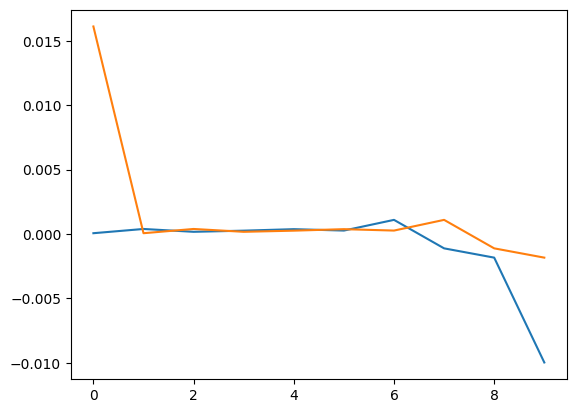

In [47]:
from matplotlib import pyplot as plt

for x, z, energy in product(range(mesh_size_x), range(mesh_size_z), range(current_max_energy_group)):
    plt.plot(non_linear_diffusive_terms[1][POSITIVE_DIR][x, :, z, 0])
    plt.plot(non_linear_diffusive_terms[1][NEGATIVE_DIR][x, :, z, 0])

In [48]:
print(flux_matrix[0, :, 0, 0, 0, 0])

[13226.1 25815.5 29846.7 31178.  31698.9 31547.5 33029.9 31713.4 25917.7
 12380.6]


In [49]:
# Generate neutron loss matrix

delta_test = 0
number_of_groups = mesh_size_x * mesh_size_y * mesh_size_z * current_max_energy_group
neutron_loss_matrix = np.zeros((number_of_groups, number_of_groups))

def get_index_in_flattened_flux_vector(energy, x, y, z):
    return energy * (mesh_size_x * mesh_size_y * mesh_size_z) + z * (mesh_size_y * mesh_size_x) + y * mesh_size_x + x

for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
    index_in_flattened_flux_vector = get_index_in_flattened_flux_vector(energy, x, y, z)

    for direction in range(3):
        spacing_inv = (1 / spacing[direction])

        is_on_high_boundary = [x == mesh_size_x - 1, y == mesh_size_y - 1, z == mesh_size_z - 1][direction]
        is_on_low_boundary = [x == 0, y == 0, z == 0][direction]
        delta_x, delta_y, delta_z = [(1, 0, 0), (0, 1, 0), (0, 0, 1)][direction]    

        # From flux l-1
        D_linear_minus = linear_diffusive_terms[direction][NEGATIVE_DIR][x, y, z, energy]
        D_linear_plus = linear_diffusive_terms[direction][POSITIVE_DIR][x, y, z, energy]

        D_non_linear_minus = non_linear_diffusive_terms[direction][NEGATIVE_DIR][x, y, z, energy]
        D_non_linear_plus = non_linear_diffusive_terms[direction][POSITIVE_DIR][x, y, z, energy]

        print("group")
        if not is_on_low_boundary:
            neutron_loss_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(energy, x - delta_x, y - delta_y, z - delta_z)] \
                += spacing_inv * (-D_linear_minus - D_non_linear_minus) \
                    + delta_test
            print(f"{D_linear_minus=}")

        # From flux l
        neutron_loss_matrix[index_in_flattened_flux_vector, index_in_flattened_flux_vector] \
            += spacing_inv * (D_linear_minus + D_linear_plus - D_non_linear_minus + D_non_linear_plus) \
                + delta_test
        print(f"{(D_linear_minus + D_linear_plus)=}")

        # From flux l+1
        if not is_on_high_boundary:
            neutron_loss_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(energy, x + delta_x, y + delta_y, z + delta_z)] \
                += spacing_inv * (-D_linear_plus + D_non_linear_plus) \
                    + delta_test
            print(f"{(D_linear_plus)=}")

    # Total XS
    neutron_loss_matrix[index_in_flattened_flux_vector, index_in_flattened_flux_vector] \
        += get_totalXS_at_coordinate(x, y, z, energy) \
            + delta_test

    # Scattering
    for h_energy in range(current_max_energy_group):
        neutron_loss_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(h_energy, x, y, z)] \
            -= get_scatter_xs(energy, h_energy, x, y, z) \
                - delta_test

group
(D_linear_minus + D_linear_plus)=0.30572812209558287
group
(D_linear_minus + D_linear_plus)=0.11878466136116067
(D_linear_plus)=0.043902974426517395
group
(D_linear_minus + D_linear_plus)=0.30572812209558287
group
(D_linear_minus + D_linear_plus)=0.30444922091444365
group
D_linear_minus=0.043902974426517395
(D_linear_minus + D_linear_plus)=0.08773825459423118
(D_linear_plus)=0.043835280167713785
group
(D_linear_minus + D_linear_plus)=0.30444922091444365
group
(D_linear_minus + D_linear_plus)=0.30507197410549086
group
D_linear_minus=0.043835280167713785
(D_linear_minus + D_linear_plus)=0.08765039353384274
(D_linear_plus)=0.04381511336612895
group
(D_linear_minus + D_linear_plus)=0.30507197410549086
group
(D_linear_minus + D_linear_plus)=0.3042546976925324
group
D_linear_minus=0.04381511336612895
(D_linear_minus + D_linear_plus)=0.08756409483515412
(D_linear_plus)=0.04374898146902517
group
(D_linear_minus + D_linear_plus)=0.3042546976925324
group
(D_linear_minus + D_linear_plus)=0.

In [50]:
linear_diffusive_terms[1][NEGATIVE_DIR][0, :, 0, 0]

array([0.07488169, 0.04390297, 0.04383528, 0.04381511, 0.04374898,
       0.04379194, 0.04384047, 0.04380245, 0.04380216, 0.04384941])

In [51]:
# Generate neutron production matrix
neutron_production_matrix = np.zeros((number_of_groups, number_of_groups))

for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
    index_in_flattened_flux_vector = get_index_in_flattened_flux_vector(energy, x, y, z)
    for energy_group_h in range(current_max_energy_group):
        neutron_production_matrix[index_in_flattened_flux_vector, get_index_in_flattened_flux_vector(energy_group_h, x, y, z)] \
            += get_nu_bar(energy, x, y, z) * get_fission_xs(energy, energy_group_h, x, y, z)


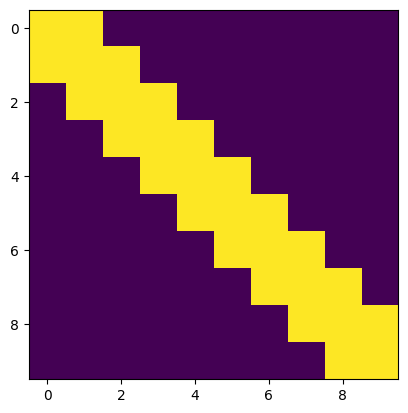

In [52]:
import matplotlib.pyplot as plt

plt.imshow((neutron_loss_matrix != 0))

print_matrix(neutron_loss_matrix)


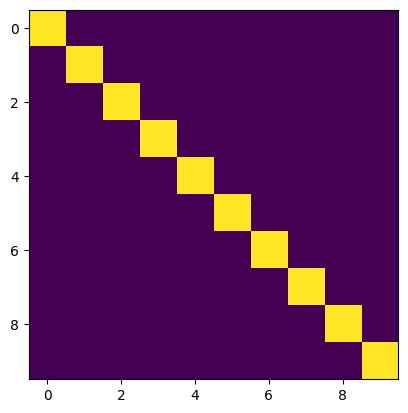

In [53]:
import matplotlib.pyplot as plt

plt.imshow(neutron_production_matrix != 0)

print_matrix(neutron_production_matrix)

In [54]:
from scipy.linalg import eig

eigenvalues, eigenvectors = eig(neutron_loss_matrix, neutron_production_matrix, check_finite=True)

In [55]:
def convert_flattened_flux_into_matrix(flattened_flux):
    matrix = np.zeros((mesh_size_x, mesh_size_y, mesh_size_z, current_max_energy_group))
    for x, y, z, energy in product(range(mesh_size_x), range(mesh_size_y), range(mesh_size_z), range(current_max_energy_group)):
        index = get_index_in_flattened_flux_vector(energy, x, y, z)
        matrix[x, y, z, energy] = flattened_flux[index]
    return matrix

[[ 0.06192223  0.12367108  0.2942244   0.37509797  0.35229326  0.43654286
   0.43222171  0.18209997 -0.33075149 -0.27352637]
 [ 0.14921589  0.25722977  0.47595791  0.41086719  0.18308725 -0.01626889
  -0.25003018 -0.27608785  0.47142615  0.29628334]
 [ 0.26909682  0.36098243  0.37926306 -0.01217847 -0.29938333 -0.43773343
  -0.23786142  0.2978533  -0.4452485  -0.11088508]
 [ 0.42570005  0.39393315  0.02972032 -0.4264534  -0.26035402  0.1514302
   0.4557207  -0.2534449   0.27884077 -0.14985484]
 [ 0.48082289  0.19996253 -0.35492684 -0.17369017  0.34123731  0.33491587
  -0.33407465  0.25927877 -0.14067979  0.37782321]
 [ 0.4526879  -0.09836889 -0.39826201  0.34399803  0.23859046 -0.36721644
  -0.06578825 -0.29666846  0.00476487 -0.48920662]
 [ 0.37321394 -0.35698041 -0.07896393  0.37370007 -0.34748588 -0.13066428
   0.41201614  0.34872901  0.13322547  0.41168717]
 [ 0.32832234 -0.53876731  0.30722058 -0.06289134 -0.31290239  0.42907189
  -0.31800348 -0.35610407 -0.24560609 -0.09376438]
 

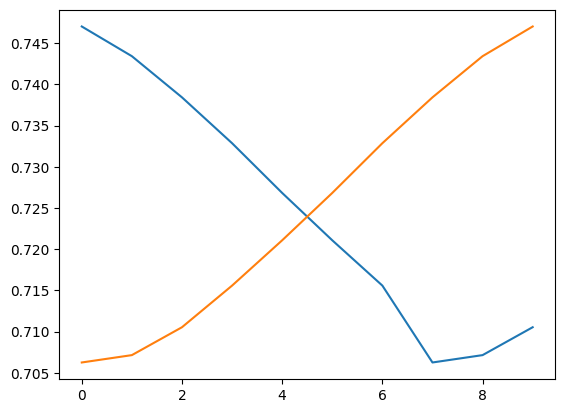

In [56]:
plt.plot(1 / np.array(eigenvalues))
plt.plot(sorted(1 / np.array(eigenvalues)))
print(eigenvectors)

In [57]:
# From stackoverflow
def gauss_seidel(A, b, tolerance, max_iterations, x):
    #x is the initial condition
    iter1 = 0
    #Iterate
    for k in range(max_iterations):
        iter1 = iter1 + 1
        x_old  = x.copy()
        
        #Loop over rows
        for i in range(A.shape[0]):
            x[i] = (b[i] - np.dot(A[i,:i], x[:i]) - np.dot(A[i,(i+1):], x_old[(i+1):])) / A[i ,i]
            
        #Stop condition 
        #LnormInf corresponds to the absolute value of the greatest element of the vector.
        
        LnormInf = max(abs((x - x_old)))/max(abs(x_old))   
        if  LnormInf < tolerance:
            break
    return x

# From openmc

def _check_convergence(s_n, s_o, k_n, k_o, iteration, innerits):
    """Checks the convergence of the CMFD problem

    Parameters
    ----------
    s_n : numpy.ndarray
        Source vector from current iteration
    s_o : numpy.ndarray
        Source vector from previous iteration
    k_n : float
        K-effective  from current iteration
    k_o : float
        K-effective from previous iteration
    iteration : int
        Iteration number
    innerits : int
        Number of iterations required for convergence in inner GS loop

    Returns
    -------
    iconv : bool
        Whether the power iteration has reached convergence
    serr : float
        Error in source from previous iteration to current iteration, used
        for dominance ratio calculations

    """
    # Calculate error in keff
    kerr = abs(k_o - k_n) / k_n

    # Calculate max error in source
    with np.errstate(divide='ignore', invalid='ignore'):
        serr = np.sqrt(np.sum(np.where(s_n > 0, ((s_n-s_o) / s_n)**2, 0))
                        / len(s_n))

    # Check for convergence
    iconv = kerr < 1.e-5 and serr < 1.e-4

    return iconv, serr

def _execute_power_iter(loss, prod):
    """Main power iteration routine for the CMFD calculation

    Parameters
    ----------
    loss : scipy.sparse.spmatrix
        Sparse matrix storing elements of CMFD loss matrix
    prod : scipy.sparse.spmatrix
        Sparse matrix storing elements of CMFD production matrix

    Returns
    -------
    phi_n : numpy.ndarray
        Flux vector of CMFD problem
    k_n : float
        Eigenvalue of CMFD problem
    dom : float
        Dominance ratio of CMFD problem

    """
    # Get problem size
    n = loss.shape[0]

    # Set up tolerances for C++ solver
    atoli = 1.e-10
    rtoli = 1.e-5
    toli = rtoli * 100

    # Set up flux vectors, intital guess set to 1
    phi_n = np.ones((n,))
    phi_o = np.ones((n,))

    # Set up source vectors
    s_n = np.zeros((n,))
    s_o = np.zeros((n,))

    # Set initial guess
    k_n = 1.5
    k_o = k_n
    dw = 1.e6
    k_s = k_o + dw
    k_ln = 1.0/(1.0/k_n - 1.0/k_s)
    k_lo = k_ln

    # Set norms to 0
    norm_n = 0.0
    norm_o = 0.0

    # Maximum number of power iterations
    maxits = 10000

    # Perform Wielandt shift
    loss -= 1.0/k_s*prod

    # Begin power iteration
    for i in range(maxits):
        if i % 20 == 0:
            print(f"Iteration {i}")
        # Check if reach max number of iterations
        if i == maxits - 1:
            raise RuntimeError('Reached maximum iterations in CMFD power '
                                'iteration solver.')

        # Compute source vector
        s_o = prod.dot(phi_o)

        # Normalize source vector
        s_o /= k_lo

        # Compute new flux with C++ solver
        innerits = gauss_seidel(loss, s_o, toli, 10000, phi_n)

        # Compute new source vector
        s_n = prod.dot(phi_n)

        # Compute new shifted eigenvalue
        k_ln = np.sum(s_n) / np.sum(s_o)

        # Compute new eigenvalue
        k_n = 1.0/(1.0/k_ln + 1.0/k_s)

        # Renormalize the old source
        s_o *= k_lo

        # Check convergence
        iconv, norm_n = _check_convergence(s_n, s_o, k_n, k_o, i+1, innerits)

        # If converged, calculate dominance ratio and break from loop
        if iconv:
            dom = norm_n / norm_o
            return phi_n, k_n, dom

        # Record old values if not converged
        phi_o = phi_n
        k_o = k_n
        k_lo = k_ln
        norm_o = norm_n

        # Update tolerance for inner iterations
        toli = max(atoli, rtoli*norm_n)

In [58]:
mc_flux, mc_k, dominance = _execute_power_iter(neutron_loss_matrix, neutron_production_matrix)

Iteration 0
Iteration 20
Iteration 40
Iteration 60
Iteration 80
Iteration 100
Iteration 120
Iteration 140
Iteration 160
Iteration 180
Iteration 200
Iteration 220
Iteration 240
Iteration 260
Iteration 280
Iteration 300
Iteration 320
Iteration 340
Iteration 360
Iteration 380


In [59]:
print(mc_k)

0.746999665756493


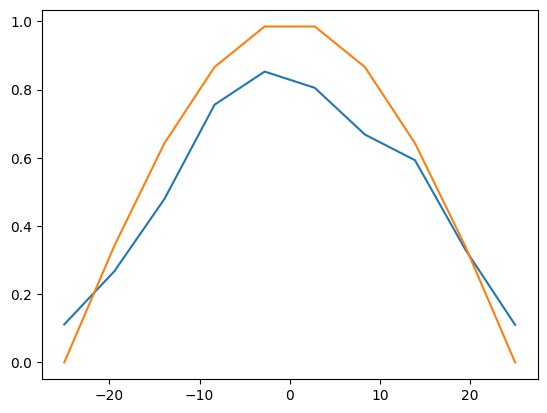

In [60]:
import matplotlib.pyplot as plt

predicted_flux = convert_flattened_flux_into_matrix(mc_flux)
y_flux = predicted_flux[0, :, 0, 0]
grid = np.linspace(-25, 25, mesh_size_y)

plt.plot(grid, y_flux)
plt.plot(grid, np.cos((np.pi * grid) / 50))

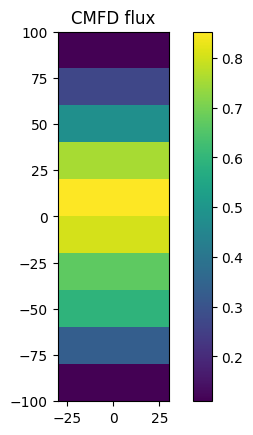

In [61]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, sharey=True)

predicted_flux = convert_flattened_flux_into_matrix(mc_flux)
total_flux = np.sum(predicted_flux[:, :, :, 0], axis=2).T
img1 = ax1.imshow(total_flux, extent=[-30, 30, -100, 100])

ax1.set_title("CMFD flux")

fig.colorbar(img1)

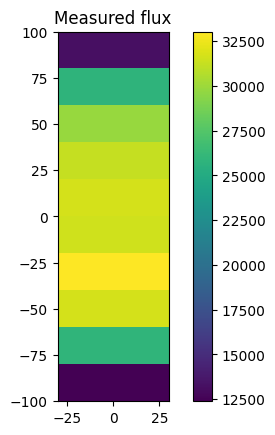

In [62]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, sharey=True)

total_flux = np.sum(flux_matrix[:, :, :, 0, 0, 0], axis=0)
img1 = ax1.imshow(total_flux, extent=[-30, 30, -100, 100])

ax1.set_title("Measured flux")

fig.colorbar(img1)